<a href="https://colab.research.google.com/github/Leo9017/DS_C2_SC2_LeonardoFernandez/blob/main/DS_C3_SC1_Leonardo_Fernandez.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DS_C3_SC1 - PLATAFORMAS DE VISUALIZACIÓN**

---

**Reto: Explorando el índice de felicidad**

NOMBRE DEL PARTICIPANTE: ------------------------------( Leonardo Fernández Ramírez )------------------------------

1.	Genera una libreta en Google Colab para el reto, cuya estructura esté basada en los análisis solicitados.

In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from google.colab import drive, data_table, files

2.	Descarga el archivo: happiness_report.csv y guarda, en un dataframe (`happiness`), todos sus registros.

In [18]:
drive.mount('/content/drive', force_remount=True)

path = '/content/drive/MyDrive/Colab Notebooks/Reto - Visualizacion/' # // Ruta del archivo
df_happiness = pd.read_csv(path + 'happiness_report.csv')
df_comparisson = pd.read_csv(path + 'Metadata.csv')

Mounted at /content/drive


3.	A partir del dataframe happiness obtén otro (`mexico`) donde sólo almacenes la información de México. Haz que la columna `Country or region` quede como índice. 

In [19]:
df_mexico_filter= df_happiness[df_happiness["Country or region"]== 'Mexico'] 
df_mexico=df_mexico_filter.set_index('Country or region')
df_mexico
#df_mexico_happiness= df_happiness[df_mexico]

#df_mexico_happiness = df_happiness['Country'] == "Mexico"
 


,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Country or region,,,,,,,,
Mexico,23,6.595,1.07,1.323,0.861,0.433,0.074,0.073


4.	Obtén un histograma del puntaje (`score`) para identificar el rango o clase más frecuente. Ubica el valor de México con una etiqueta de texto. 

Text(6.592, 0, 'Mex')

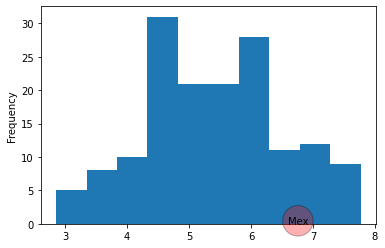

In [ ]:
from matplotlib.backend_bases import transforms
df_happiness['Score'].plot.hist()
plt.text(6.592,0,"Mex",bbox=dict(facecolor='red',alpha=0.3,pad=0.5,boxstyle='circle'))

5.	Construye un box plot para la columna esperanza de vida (`Healthy life expectancy`). Ubica el valor de México con una anotación.

Text(1.25, 0.861, 'Mex')

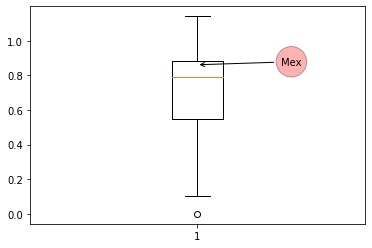

In [ ]:
from matplotlib.image import Bbox
plt.boxplot(df_happiness['Healthy life expectancy'])
plt.annotate('Mex',xy=(1,0.861),xytext=(1.25,0.861),arrowprops=dict(arrowstyle='->'),Bbox=dict(boxstyle ="circle",facecolor='red',alpha=0.3,pad=0.5))

6.	Crea una gráfico circular para analizar en qué medida los factores contribuyen a evaluar la felicidad en México. Para ello, deberás modificar la estructura del dataframe `mexico` obtenido anteriormente.

<AxesSubplot:title={'center':'Contribution in Mexico happiness score'}, ylabel='Factors'>

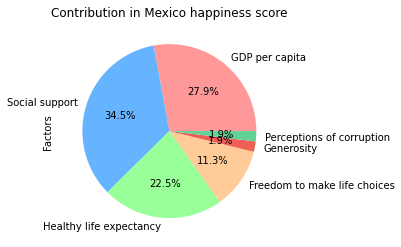

In [33]:
df_mexico_filter= df_mexico_filter[["GDP per capita","Social support","Healthy life expectancy","Freedom to make life choices","Generosity","Perceptions of corruption"]]
df_mexico_pie=df_mexico_filter.transpose()

df_mexico_pie["Factors"]=df_mexico_pie
del df_mexico_pie[22]
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"#EE6055","#60D394"]

df_mexico_pie.plot.pie(y='Factors',labels=df_mexico_pie.index,autopct='%1.1f%%',legend=False, colors=colors,title='Contribution in Mexico happiness score')

7.	Filtra el dataframe para quedarte con 5 países (el más feliz, el menos feliz, México y dos más de tu interés) y visualiza en una misma gráfica los 6 factores.

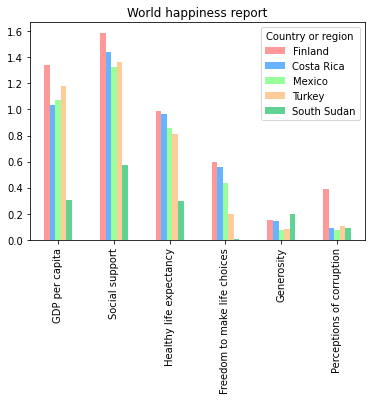

In [ ]:
from numpy.core.fromnumeric import transpose


df_happiness.sort_values(by='Score') #Obtener el valor central para comparación paso 1
Mid_Value = df_happiness.loc[df_happiness['Score'].count()/2,'Country or region'] #Obtener el valor central para comparación paso 2

df_cinco_paises = df_happiness.loc[(df_happiness['Country or region'] == 'Mexico') | (df_happiness['Country or region'] == 'Costa Rica') | (df_happiness['Score'] == df_happiness['Score'].max()) | (df_happiness['Score'] == df_happiness['Score'].min()) | (df_happiness['Country or region'] == Mid_Value) ]

df_cinco_paises= df_cinco_paises[['Country or region','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]]

df_cinco_paises=df_cinco_paises.set_index("Country or region")
df_cinco_paises=df_cinco_paises.transpose()

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"#60D394"]

df_cinco_paises.plot(kind="bar", color=colors, title="World happiness report" )


8.	Crea una matriz de subgráficas de 2 x 3 con scatter plots del puntaje (`score`) versus los 6 factores para determinar qué factor influye más en la evaluación.

<ipython-input-5-921fc0396c79>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
<ipython-input-5-921fc0396c79>:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
<ipython-input-5-921fc0396c79>:27: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
<ipython-input-5-921fc0396c79>:36: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
<ipython-input-5-921fc0396c79>:45: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
<ipython-input-5-921fc0396c79>:54: UserWarning: FixedFormatter should only be used tog

Text(0, 0.5, 'Perceptions of corruption')

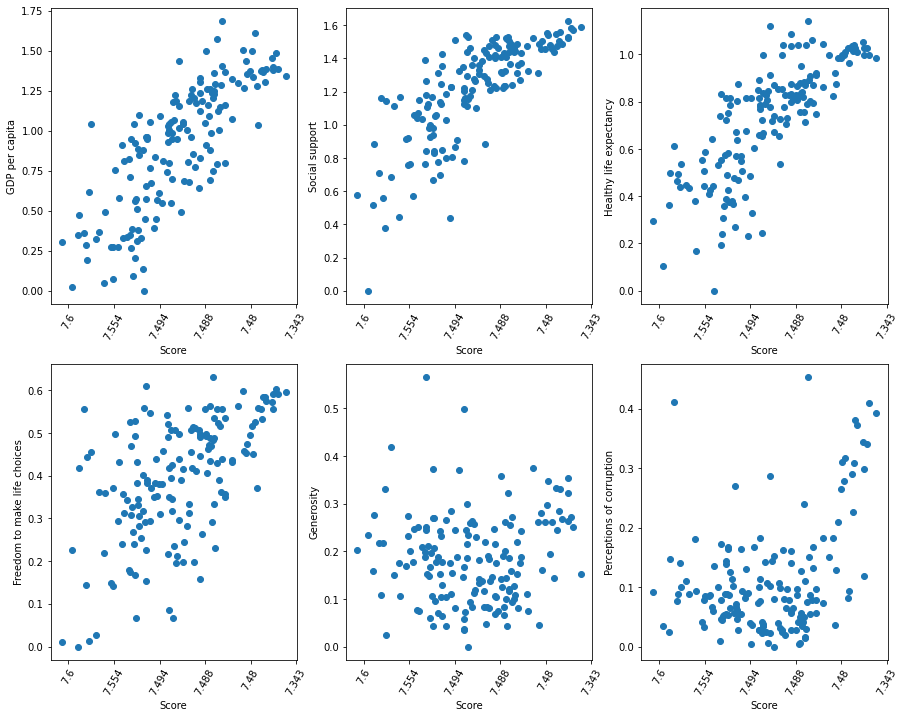

In [5]:
#df_scatter= df_happiness[['','GDP per capita','Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption' ]]

plt.figure(figsize=(15,12))    #Figura. Puede incluirse el tamaño con figsize
x_values1 = df_happiness['Score']
y_values1 = df_happiness['GDP per capita']
ax = plt.subplot(2, 3, 1)                   #Axis
plt.scatter(x_values1, y_values1)          #El gráfico
ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
ax.set_xlabel('Score')  #Nombre del eje x
ax.set_ylabel('GDP per capita')  #Nombre del eje y


x_values1 = df_happiness['Score']
y_values2 = df_happiness['Social support']
ax = plt.subplot(2, 3, 2)                   #Axis
plt.scatter(x_values1, y_values2)          #El gráfico
#plt.title('Pedidos de comida')      #El título
ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
ax.set_xlabel('Score')  #Nombre del eje x
ax.set_ylabel('Social support')  #Nombre del eje y

x_values1 = df_happiness['Score']
y_values3 = df_happiness['Healthy life expectancy']
ax = plt.subplot(2, 3, 3)                   #Axis
plt.scatter(x_values1, y_values3)          #El gráfico
#plt.title('Pedidos de comida')      #El título
ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
ax.set_xlabel('Score')  #Nombre del eje x
ax.set_ylabel('Healthy life expectancy')  #Nombre del eje y

x_values1 = df_happiness['Score']
y_values4 = df_happiness['Freedom to make life choices']
ax = plt.subplot(2, 3, 4)                   #Axis
plt.scatter(x_values1, y_values4)          #El gráfico
#plt.title('Pedidos de comida')      #El título
ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
ax.set_xlabel('Score')  #Nombre del eje x
ax.set_ylabel('Freedom to make life choices')  #Nombre del eje y

x_values1 = df_happiness['Score']
y_values5 = df_happiness['Generosity']
ax = plt.subplot(2, 3, 5)                   #Axis
plt.scatter(x_values1, y_values5)          #El gráfico
#plt.title('Pedidos de comida')      #El título
ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
ax.set_xlabel('Score')  #Nombre del eje x
ax.set_ylabel('Generosity')  #Nombre del eje y

x_values1 = df_happiness['Score']
y_values6 = df_happiness['Perceptions of corruption']
ax = plt.subplot(2, 3, 6)                   #Axis
plt.scatter(x_values1, y_values6)          #El gráfico
#plt.title('Pedidos de comida')      #El título
ax.set_xticklabels(x_values1, rotation=60)        #Etiquetas del eje x
ax.set_xlabel('Score')  #Nombre del eje x
ax.set_ylabel('Perceptions of corruption')  #Nombre del eje y



9.	Comprueba lo anterior con un heatmap donde incluyas los índices de correlación.

<AxesSubplot:>

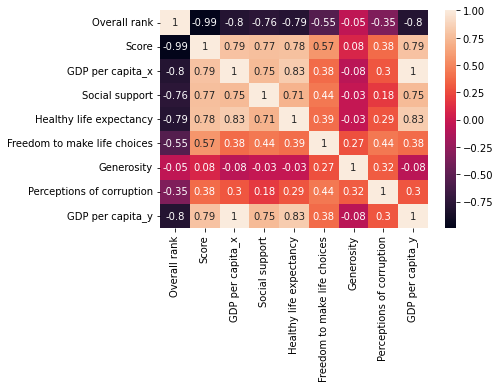

In [26]:
sns.heatmap(round(df_happiness.corr(),2),annot=True)



10.	Combina con el dataframe `metada` (Metadata.csv) para graficar la felicidad promedio por región. 

<AxesSubplot:title={'center':'World happiness report per region'}, xlabel='Region'>

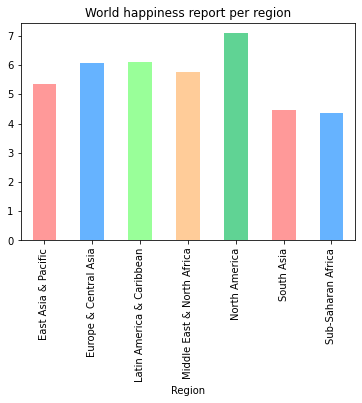

In [36]:
df_comparisson_merge=df_comparisson.set_index('TableName')
df_happiness_merge=df_happiness.set_index('Country or region')

df_comparisson_merge=df_comparisson.rename(columns={"TableName": "Country or region"})

df_result1= pd.merge(df_happiness_merge, df_comparisson_merge, on="Country or region")

df_happiness_region = df_result1.groupby(by=["Region"]).agg({"Score": np.median})

colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99',"#60D394"]
#df_happiness_region=df_happiness_region.transpose()
df_happiness_region.plot(y='Score', kind="bar", color=colors, title="World happiness report per region", legend=False )

